In [ ]:
!pip install nltk spacy matplotlib seaborn
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import csv

# Reading reviews from CSV file.
# This file contains 34 rows with 2 columns.
# The original dataset can be found on Kaggle : https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews
# Since the assignment requires small dataset, I reduced the original dataset.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP_Assignment/tripadvisor_reviews.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip', encoding='utf-8', delimiter=';')

df.head()
texts = df['Review'].tolist()

# NLTK


---

In this section, the following items were coded and graphed using NLTK.

*   Tokenization
*   Stemming
*   Lematization





In [ ]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

nltk_tokens = []
nltk_stems = []
nltk_lemmas = []

for text in texts:
    tokens = word_tokenize(text.lower())
    nltk_tokens.extend(tokens)
    nltk_stems.extend([ps.stem(token) for token in tokens])
    nltk_lemmas.extend([lemmatizer.lemmatize(token) for token in tokens])


# Printing first 5 reviews, to check out.
for i, text in enumerate(texts[:5]):
    tokens = word_tokenize(text.lower())
    stems = [ps.stem(token) for token in tokens]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]

    print(f"\n--- Review {i+1} ---")
    print(f"Original Review:\n{text}\n")
    print(f"Tokens:\n{tokens}\n")
    print(f"Stemming:\n{stems}\n")
    print(f"Lemmatization:\n{lemmas}\n")


--- Review 1 ---
Original Review:
nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,

Tokens:
['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', ',', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', ',', 'check', 'quick', 'easy', ',', 'little', 'disappointed', 'non-existent', 'view', 'room', 'room', 'clean', 'nice', 'size', ',', 'bed', 'comfortable', 'woke', 's

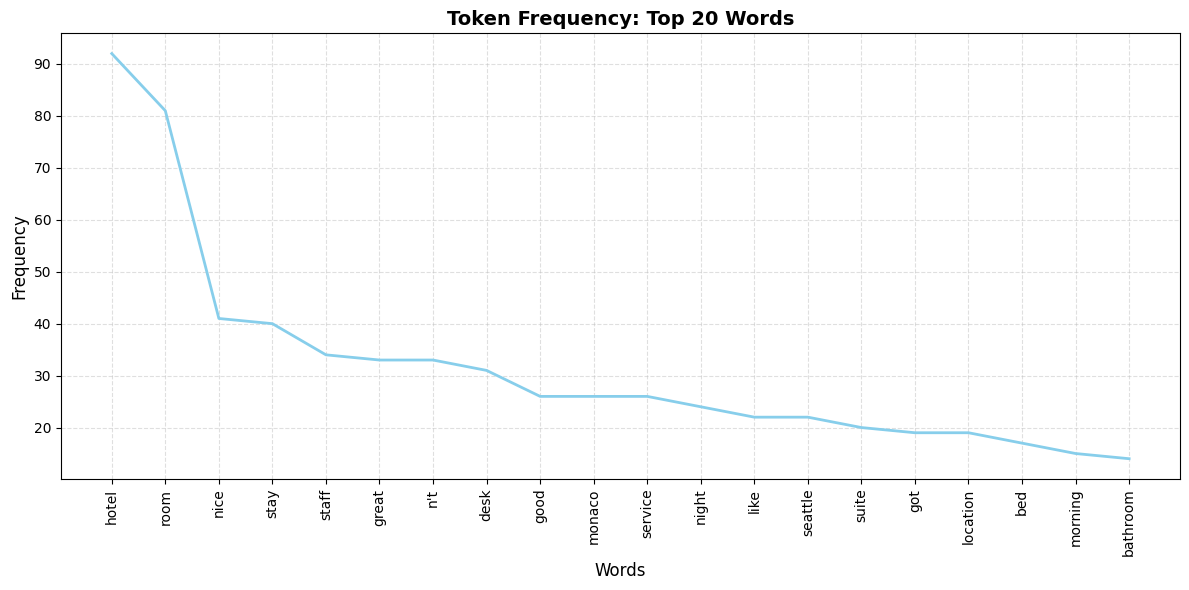

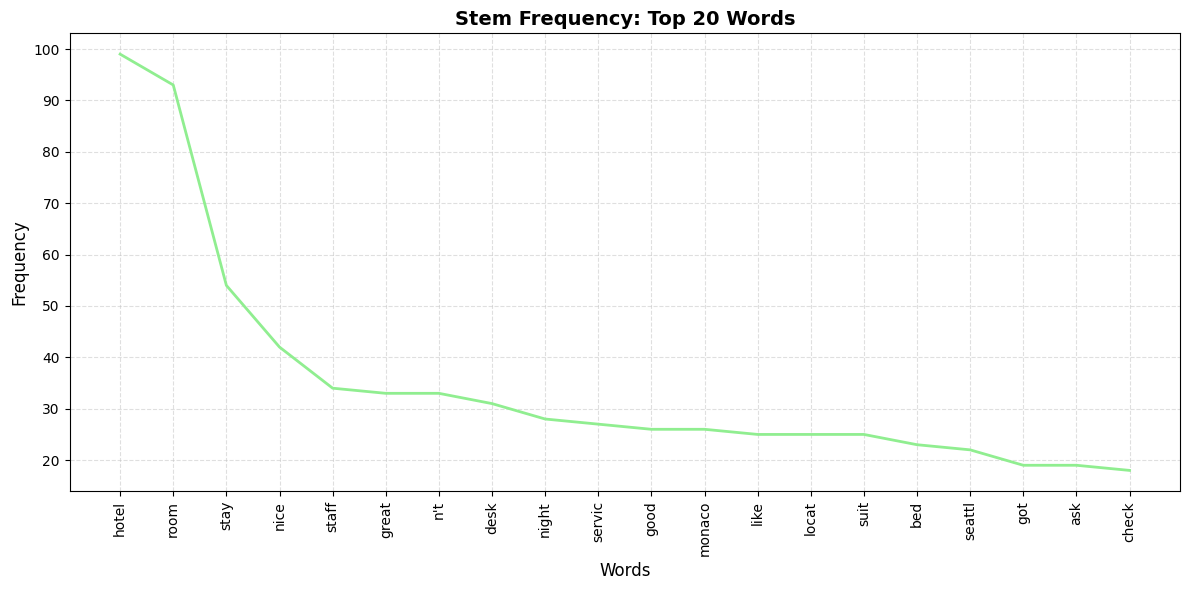

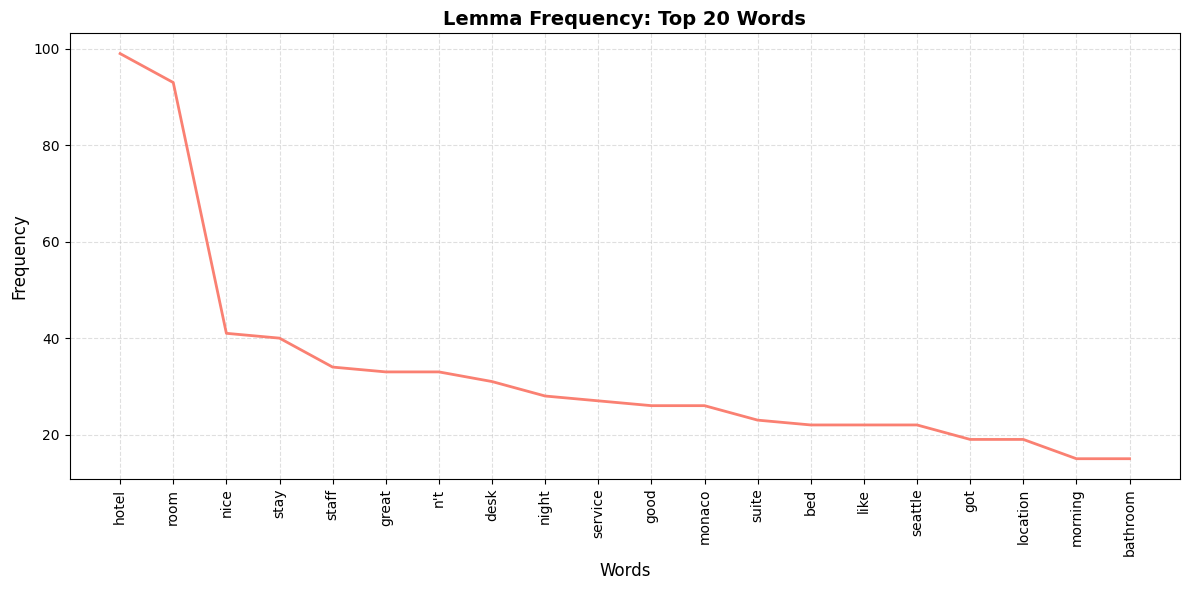

In [ ]:
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.probability import FreqDist

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

filtered_tokens_nltk = [w for w in nltk_tokens if w.lower() not in stop_words and w not in punctuations]
filtered_stem_nltk = [w for w in nltk_stems if w.lower() not in stop_words and w not in punctuations]
filtered_lemmas_nltk = [w for w in nltk_lemmas if w.lower() not in stop_words and w not in punctuations]

tokenDist = FreqDist(filtered_tokens_nltk)
stemDist = FreqDist(filtered_stem_nltk)
lemmaDist = FreqDist(filtered_lemmas_nltk)

def plot_freq_dist(freq_dist, title, color):
    plt.figure(figsize=(12, 6))
    freq_dist.plot(20, color=color, title=title)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

# tokenDist = FreqDist(nltk_tokens)
# stemDist = FreqDist(nltk_stems)
# lemmaDist = FreqDist(nltk_lemmas)

plot_freq_dist(tokenDist, 'Token Frequency: Top 20 Words', 'skyblue')
plot_freq_dist(stemDist, 'Stem Frequency: Top 20 Words', 'lightgreen')
plot_freq_dist(lemmaDist, 'Lemma Frequency: Top 20 Words', 'salmon')

plt.show()


# spaCy

---

In this section, the following items were coded and graphed using spaCY.

*   Tokenization
*   Lematization



> spaCY does not have built-in stemming tool.\
> Instead it is sugessted to use Porter Stemmer of nltk.
> References: https://github.com/explosion/spaCy/issues/327#issuecomment-208164148 \ https://medium.com/eni-digitalks/text-preprocessing-nlp-fundamentals-with-spacy-54f32e520bc8




In [ ]:
import pandas as pd

spacy_tokens = []
spacy_lemmas = []

for text in texts:
    doc = nlp(text.lower())
    for token in doc:
        if not token.is_space:
            spacy_tokens.append(token.text)
            spacy_lemmas.append(token.lemma_)

for i, text in enumerate(texts[:5]):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if not token.is_space]
    lemmas = [token.lemma_ for token in doc if not token.is_space]

    print(f"\n--- Review {i+1} ---")
    print(f"Original Review:\n{text}\n")
    print(f"Tokens:\n{tokens}\n")
    print(f"Lemmatization:\n{lemmas}\n")


--- Review 1 ---
Original Review:
nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,

Tokens:
['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', ',', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', ',', 'check', 'quick', 'easy', ',', 'little', 'disappointed', 'non', '-', 'existent', 'view', 'room', 'room', 'clean', 'nice', 'size', ',', 'bed', 'comfortable', 'w

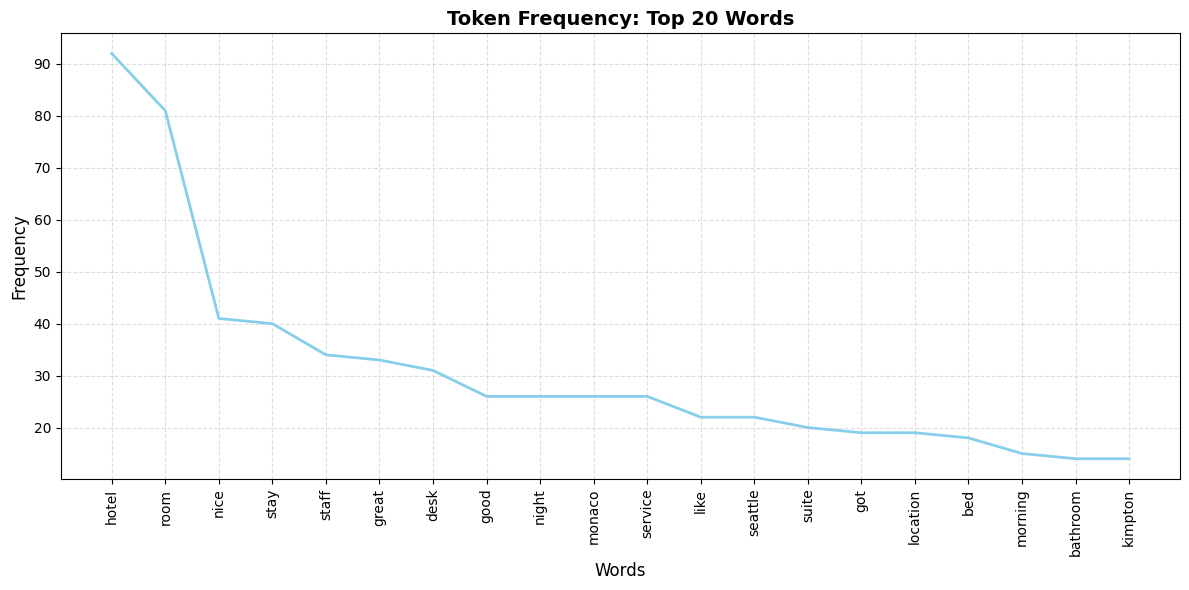

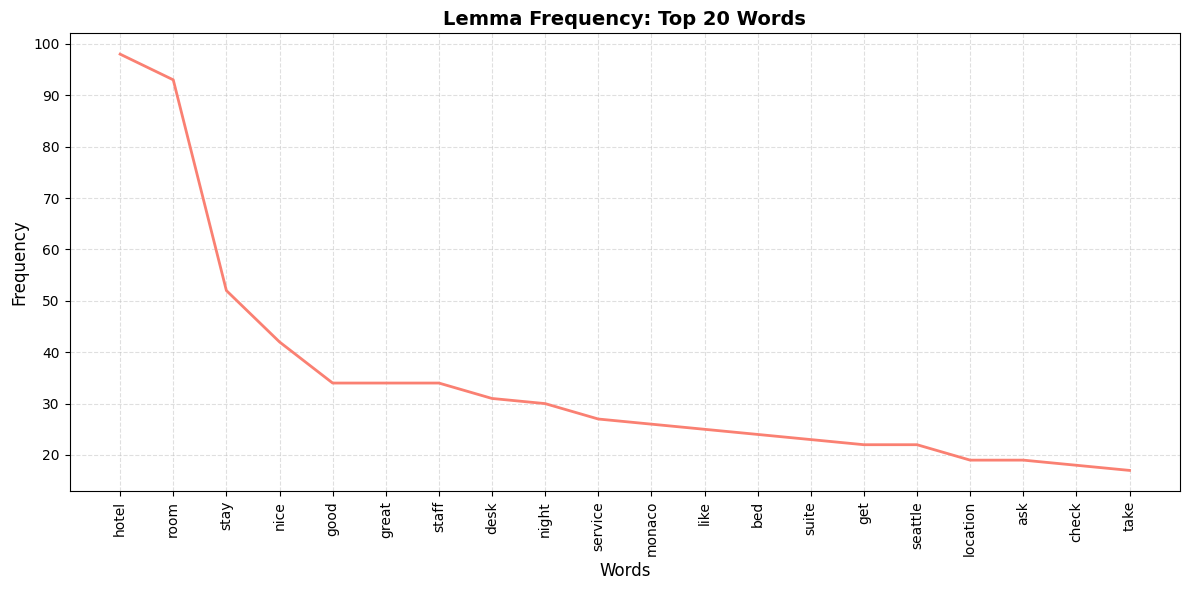

In [ ]:
import spacy
import string
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load("en_core_web_sm")

filtered_tokens_spacy = []
filtered_lemmas_spacy = []

for doc in nlp.pipe((text.lower() for text in texts), batch_size=20):
    for token in doc:
        if not token.is_space and not token.is_punct and not token.is_stop:
            filtered_tokens_spacy.append(token.text)
            filtered_lemmas_spacy.append(token.lemma_)

def plot_freq_dist(freq_dist, title, color):
    plt.figure(figsize=(12, 6))
    freq_dist.plot(20, color=color, title=title)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

tokenDistSpacy = FreqDist(filtered_tokens_spacy)
lemmaDistSpacy = FreqDist(filtered_lemmas_spacy)

plot_freq_dist(tokenDistSpacy, 'Token Frequency: Top 20 Words', 'skyblue')
plot_freq_dist(lemmaDistSpacy, 'Lemma Frequency: Top 20 Words', 'salmon')

plt.show()

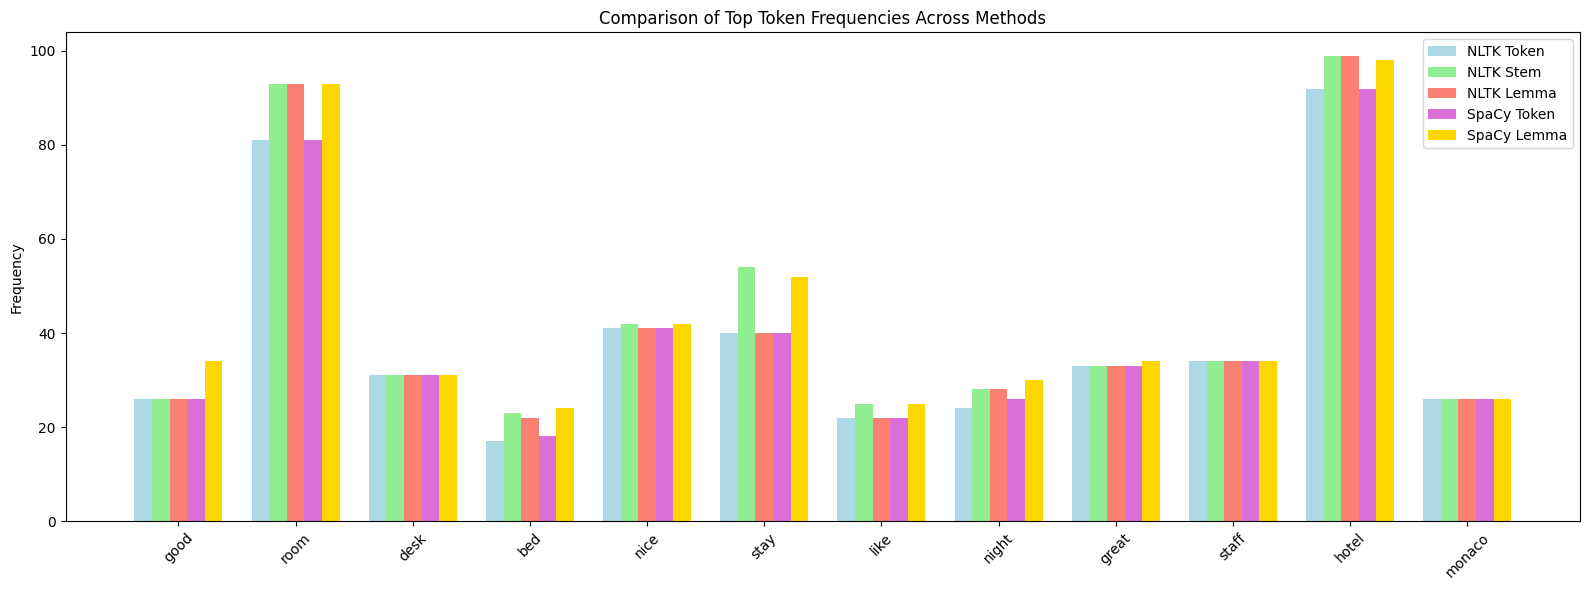

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

nltk_token_counts = Counter(filtered_tokens_nltk).most_common(20)
nltk_stem_counts = Counter(filtered_stem_nltk).most_common(20)
nltk_lemma_counts = Counter(filtered_lemmas_nltk).most_common(20)
spacy_token_counts = Counter(filtered_tokens_spacy).most_common(20)
spacy_lemma_counts = Counter(filtered_lemmas_spacy).most_common(20)

common_words = list(set([w for w, _ in nltk_token_counts]) &
                    set([w for w, _ in nltk_stem_counts]) &
                    set([w for w, _ in nltk_lemma_counts]) &
                    set([w for w, _ in spacy_token_counts]) &
                    set([w for w, _ in spacy_lemma_counts]))

def get_freqs(word_list, common_words):
    counter = Counter(word_list)
    return [counter[w] for w in common_words]

freqs_nltk_token = get_freqs(filtered_tokens_nltk, common_words)
freqs_nltk_stem = get_freqs(filtered_stem_nltk, common_words)
freqs_nltk_lemma = get_freqs(filtered_lemmas_nltk, common_words)
freqs_spacy_token = get_freqs(filtered_tokens_spacy, common_words)
freqs_spacy_lemma = get_freqs(filtered_lemmas_spacy, common_words)

x = np.arange(len(common_words))
width = 0.15

plt.figure(figsize=(16,6))
plt.bar(x - 2*width, freqs_nltk_token, width, label='NLTK Token', color='lightblue')
plt.bar(x - width, freqs_nltk_stem, width, label='NLTK Stem', color='lightgreen')
plt.bar(x, freqs_nltk_lemma, width, label='NLTK Lemma', color='salmon')
plt.bar(x + width, freqs_spacy_token, width, label='SpaCy Token', color='orchid')
plt.bar(x + 2*width, freqs_spacy_lemma, width, label='SpaCy Lemma', color='gold')

plt.xticks(x, common_words, rotation=45)
plt.ylabel('Frequency')
plt.title('Comparison of Top Token Frequencies Across Methods')
plt.legend()
plt.tight_layout()
plt.show()